In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import pickle

In [2]:
pip install seaborn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
df = pd.read_csv('../Dataset/LongParameter.csv')

In [6]:
df.sample(5)

,Code,Smell
297,public int factorial(int number) {\n if...,0
684,public int countSubstringOccurrences(String st...,0
916,public double averageOfArray(int[] nums) {\n ...,0
959,"public void createUserAccount(String username,...",1
96,"public void drawBox(int width, int height, cha...",1


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [8]:
pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
df['Smell'] = encoder.fit_transform(df['Smell'])

In [10]:
df.head()

,Code,Smell
0,public double calculateTotalBill(double basePr...,1
1,"public void addProduct(String name, String des...",1
2,"public void addSevenNumber(int number1, int nu...",1
3,"public void Product(String name, String descri...",1
4,"public void sendEmail(String sender, String re...",1


In [11]:
df['Smell'].value_counts()

Smell
0    531
1    469
Name: count, dtype: int64

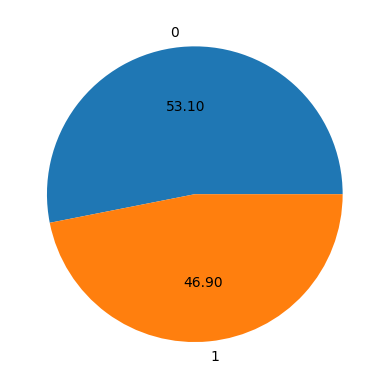

In [12]:
import matplotlib.pyplot as plt
plt.pie(df['Smell'].value_counts(), labels=['0','1'],autopct="%0.2f")
plt.show()

In [13]:
!pip install javalang

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import javalang

In [15]:
def parse_code_to_ast(code):
    try:
        return javalang.parse.parse_member_signature(code)
    except (javalang.parser.JavaSyntaxError, javalang.tokenizer.LexerError):
        return None

In [16]:
df['AST'] = df['Code'].apply(parse_code_to_ast)

In [17]:

for ast_tree in df['AST']:
    print(ast_tree)
    print("\n")

MethodDeclaration(annotations=[], body=[ReturnStatement(expression=BinaryOperation(operandl=BinaryOperation(operandl=MemberReference(member=basePrice, postfix_operators=[], prefix_operators=[], qualifier=, selectors=[]), operandr=BinaryOperation(operandl=Literal(postfix_operators=[], prefix_operators=[], qualifier=None, selectors=[], value=1), operandr=BinaryOperation(operandl=MemberReference(member=taxRate, postfix_operators=[], prefix_operators=[], qualifier=, selectors=[]), operandr=Literal(postfix_operators=[], prefix_operators=[], qualifier=None, selectors=[], value=100), operator=/), operator=+), operator=*), operandr=BinaryOperation(operandl=Literal(postfix_operators=[], prefix_operators=[], qualifier=None, selectors=[], value=1), operandr=BinaryOperation(operandl=MemberReference(member=discountPercentage, postfix_operators=[], prefix_operators=[], qualifier=, selectors=[]), operandr=Literal(postfix_operators=[], prefix_operators=[], qualifier=None, selectors=[], value=100), ope

In [18]:
def parse_code_to_ast_and_count_params(code):
    try:
        ast_tree = javalang.parse.parse_member_signature(code)
        if isinstance(ast_tree, javalang.tree.MethodDeclaration):
            return len(ast_tree.parameters)
        else:
            return 0
    except (javalang.parser.JavaSyntaxError, javalang.tokenizer.LexerError):
        return 0

In [19]:
df['Parameter_Count'] = df['Code'].apply(parse_code_to_ast_and_count_params)

In [20]:
df.head(28)

,Code,Smell,AST,Parameter_Count
0,public double calculateTotalBill(double basePr...,1,"MethodDeclaration(annotations=[], body=[Return...",6
1,"public void addProduct(String name, String des...",1,"MethodDeclaration(annotations=[], body=[Statem...",8
2,"public void addSevenNumber(int number1, int nu...",1,"MethodDeclaration(annotations=[], body=[Return...",7
3,"public void Product(String name, String descri...",1,"MethodDeclaration(annotations=[], body=[Statem...",8
4,"public void sendEmail(String sender, String re...",1,"MethodDeclaration(annotations=[], body=[LocalV...",7
5,"public Object[] sort(String[] FILENAME3, Strin...",1,"MethodDeclaration(annotations=[], body=[ForSta...",5
6,"public void processOrder(String customerName, ...",1,"MethodDeclaration(annotations=[], body=[LocalV...",7
7,"public void generateReport(String dataSource, ...",1,"MethodDeclaration(annotations=[], body=[LocalV...",8
8,"public void createUser(String firstName, Strin...",1,"MethodDeclaration(annotations=[], body=[LocalV...",12
9,"public static void sortNumbers(int num1, int n...",1,"MethodDeclaration(annotations=[], body=[LocalV...",7


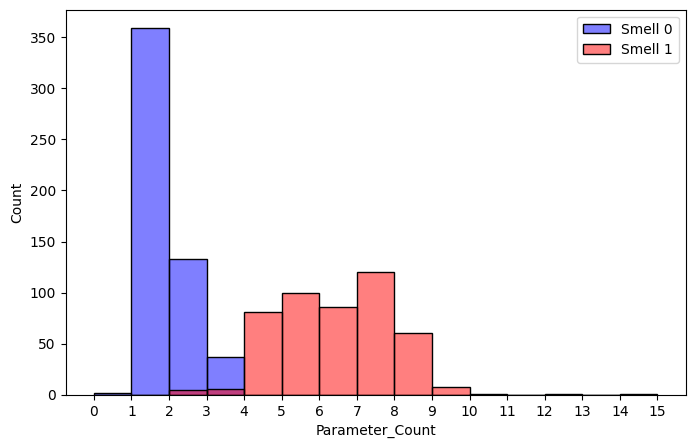

In [21]:
plt.figure(figsize=(8,5))
sns.histplot(df[df['Smell'] == 0]['Parameter_Count'], bins=range(df['Parameter_Count'].min(), df['Parameter_Count'].max() + 1), color='blue', alpha=0.5, label='Smell 0')
sns.histplot(df[df['Smell'] == 1]['Parameter_Count'], bins=range(df['Parameter_Count'].min(), df['Parameter_Count'].max() + 1), color='red', alpha=0.5, label='Smell 1')
plt.xticks(range(df['Parameter_Count'].min(), df['Parameter_Count'].max() + 1))  # Set the x-axis ticks
plt.legend()
plt.show()


In [22]:
X = df['Parameter_Count'].values.reshape(-1, 1)

In [23]:
y = df['Smell'].values

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [26]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [27]:
gnb = GaussianNB()

In [28]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(y_pred1)
print(accuracy_score(y_test,y_pred1))

[1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0
 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0
 1 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0
 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1
 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 1
 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0]
0.975


In [30]:
def test_model(java_code):
    def parse_code_to_ast_and_count_params(code):
        try:
            ast_tree = javalang.parse.parse_member_signature(code)
            if isinstance(ast_tree, javalang.tree.MethodDeclaration):
                return len(ast_tree.parameters)
            else:
                return 0
        except (javalang.parser.JavaSyntaxError, javalang.tokenizer.LexerError):
            return 0
    param_count = parse_code_to_ast_and_count_params(java_code)
    print(param_count)
    param_vector = np.array([[param_count]])
    prediction = gnb.predict(param_vector)
    return "Smell detected" if prediction[0] == 1 else "No smell detected"

java_code = """
public double calculateTotalBill(double discountPercentage, int x,double discountPercentage, int x,double discountPercentage, int x) {
    return basePrice * (1 + taxRate / 100) * (1 - discountPercentage / 100);
}
"""
result = test_model(java_code)
print(result)


6
Smell detected


In [31]:
with open('../Pkl File/long_parameter.pkl', 'wb') as model_file:
    pickle.dump(gnb, model_file)